In [179]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.util import ngrams
import seaborn as sns 

In [2]:
df=pd.read_csv("10. tripadvisor_hotel_reviews.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  109 non-null    object
 1   Rating  109 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [4]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [7]:
numer=i0_0.split(" ")

In [8]:
len(numer)

89

In [6]:
i0_0=df.iloc[0,0]

In [9]:
df['LowerCase']=df['Review'].str.lower()

In [10]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
eng_stopwords=stopwords.words('english')

In [25]:
eng_stopwords.remove('not')

In [45]:
print("nice" in eng_stopwords)

False


In [27]:
df.head()

,Review,Rating,LowerCase
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso..."


In [74]:

wor=[]
for i in df.iloc[:,0]:
    words=i.split(" ")
    
    wor.append([" ".join([word for word in words if word not in eng_stopwords])])

    # w=" ".join(wor)
    # print(w)

In [85]:
df['stopword_remove']=df['LowerCase'].apply(lambda x: " ".join([word for word in x.split(" ") if word not in eng_stopwords]))

In [35]:
df['LowerCase'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [86]:
df.head()

,Review,Rating,LowerCase,stopword_remove
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


In [124]:
df['stopword_remove_no_puntuation']=df.apply(lambda x: re.sub(r"[*]","Star",x['stopword_remove']), axis=1)

In [125]:
df.head()

,Review,Rating,LowerCase,stopword_remove,stopword_remove_no_puntuation
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4Star experience hotel monaco s...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


In [129]:
df['stopword_remove_no_puntuation']=df.apply(lambda x: re.sub(r"([^\w\s])","",x['stopword_remove_no_puntuation']),axis=1)

In [130]:
df['stopword_remove_no_puntuation'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night  '

In [135]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [136]:
df['Tokenized']=df.apply(lambda x: word_tokenize(x['stopword_remove_no_puntuation']),axis=1)

In [152]:
print(type(df['Tokenized'][0]))

<class 'list'>


In [154]:
ps=PorterStemmer()

In [155]:
df['stemed']=df['Tokenized'].apply(lambda tokens: [ps.stem(token) for token in tokens])

In [163]:
ls=WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...


True

In [164]:
df['Lemmatised']=df['Tokenized'].apply(lambda tokens: [ls.lemmatize(token) for token in tokens])

In [165]:
df['Lemmatised']

0      [nice, hotel, expensive, parking, got, good, d...
1      [ok, nothing, special, charge, diamond, member...
2      [nice, room, not, 4Star, experience, hotel, mo...
3      [unique, great, stay, wonderful, time, hotel, ...
4      [great, stay, great, stay, went, seahawk, game...
                             ...                        
104    [fairmont, hotel, singapore, splendid, stayed,...
105    [great, hotel, stayed, hotel, night, route, pe...
106    [great, hotel, centre, stayed, 5, night, room,...
107    [great, location, great, value, great, hotel, ...
108    [lovely, hotel, great, location, stayed, vacat...
Name: Lemmatised, Length: 109, dtype: object

In [170]:
sun_tokenised_list=sum(df['Lemmatised'],[])

In [173]:
unigram=(pd.Series(nltk.ngrams(sun_tokenised_list,1))).value_counts()

In [174]:
unigram

(hotel,)           292
(room,)            275
(great,)           126
(not,)             122
(stay,)             95
                  ... 
(la,)                1
(175,)               1
(smackagainst,)      1
(2x,)                1
(connected,)         1
Name: count, Length: 2588, dtype: int64

In [196]:
bigram=(pd.Series(nltk.ngrams(sun_tokenised_list,2))).value_counts()

In [197]:
bigram

(great, location)     24
(space, needle)       21
(hotel, monaco)       16
(great, hotel)        12
(staff, friendly)     12
                      ..
(didnt, make)          1
(personnel, didnt)     1
(minute, stay)         1
(starting, minute)     1
(food, raffle)         1
Name: count, Length: 8263, dtype: int64

In [198]:
bigram_df=bigram.reset_index()

In [201]:
bigram_df.columns=['bigram','count']

In [202]:
bigram_df

,bigram,count
0,"(great, location)",24
1,"(space, needle)",21
2,"(hotel, monaco)",16
3,"(great, hotel)",12
4,"(staff, friendly)",12
...,...,...
8258,"(didnt, make)",1
8259,"(personnel, didnt)",1
8260,"(minute, stay)",1
8261,"(starting, minute)",1


In [215]:
bigram_df['bigram']=bigram_df.apply(lambda x: " ".join(x['bigram']),axis=1)

In [222]:
bigram_df=bigram_df.drop('bigram_',axis=1)

In [223]:
bigram_df

,bigram,count
0,great location,24
1,space needle,21
2,hotel monaco,16
3,great hotel,12
4,staff friendly,12
...,...,...
8258,didnt make,1
8259,personnel didnt,1
8260,minute stay,1
8261,starting minute,1


<Axes: xlabel='count', ylabel='bigram'>

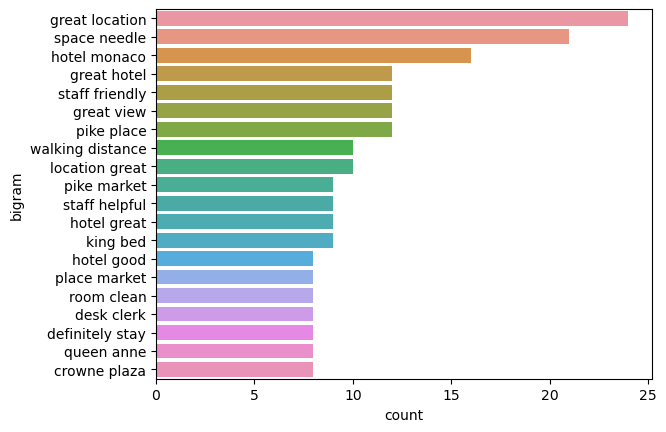

In [228]:
sns.barplot(data=bigram_df.head(20),x='count',y='bigram')